In [21]:
#多頁爬取子分頁
import requests #匯入函式庫
from bs4 import BeautifulSoup #大倉庫匯bs4入小倉庫BeautifulSoup
import shutil #檔案下載與儲存的函式庫
import os
import json

dirname = 'D:/styler/img/NET/top/uncut/'
m = '1'
n=1
p=1
urll = []
j = {}
for page in range(1,3): #2頁
    url = 'https://www.net-fashion.net/category/1552/x'
    url = url.replace('x',str(page))#前者替換為後者 page是每次迴圈提取資料 str是強制轉換為文字型態(以這個例子只跑1、2 兩次)
    res = requests.get(url)
    soup = BeautifulSoup(res.text,'html.parser')#解析爬回來的頁面資料 後者為解析模式

    for pictures in soup.select('.main_img>a'):
        res1 = requests.get(pictures['href'])
        print(pictures['href'])
        soup1 = BeautifulSoup(res1.text,'html.parser')#解析爬回來的頁面資料 後者為解析模式
#         print(soup1)
        
        
        #品牌
        j["brand"] = "NET"
        
        #品名
        name = soup1.find_all('div',{'class':'product_detail_Right_title'})
        for n in name:
            n1 = n.text
            n1 = n1.replace('\r','')
            n1 = n1.replace('\n','')
            n1 = n1.replace('\r','') 
#             print(n1)
            j['product_name'] = n1
        
        #價錢
        price1 = soup1.find_all('div',{'class':'product_priceR_real'})
        for p in price1:
            p1 = p.text
            p1 = p1.replace('NT$','')
            p1 = p1.replace('r1','')
            p1 = p1.replace('\n','')
            p1 = p1.replace(',','')
            p1 = p1.replace('r1','')
            p1 = p1.replace('\n','')
            p1 = p1.replace(' ','')  
#             print(p1)
            j['price'] = p1
          
        #價錢
        price = soup1.find_all('div',{'class':'product_priceR_original'})
        for p in price:
            p1 = p.text
            p1 = p1.replace('NT$','')
            p1 = p1.replace('\r','')
            p1 = p1.replace('\n','')
            p1 = p1.replace(',','')
            p1 = p1.replace('\n','')
            p1 = p1.replace('\r','')
            p1 = p1.replace(' ','')  
#             print(p1)
            j['price'] = p1
         
        
            
        j['website_url'] = pictures['href']
        
        count = 0 
        for sub_pictures in soup1.select('.html_block_detail>p>img'):
           #fname = dirname+'/'+pictures['src'].split('/')[-1].split('?')[0]#取得圖檔名稱
            url = sub_pictures['src'].split('?')[0]
            if count<=1: #每個子分頁只爬前面兩張
                if url not in urll:
                    m = m.zfill(5)
                    fname = dirname+'/'+'NET_' + str(m) + '.jpg'#取得圖檔名稱
                    print(fname)
                    print(url)
#                 n+=1
                    urll.append(url)
                    print(j)
                    res2 = requests.get(url,stream=True)#在下載時保持連線的狀態防止看得到檔名卻沒有內容
                    pics = open(fname,'wb')#將取得的圖檔名稱寫入電腦資料還沒有內涵，wb=write binary
                    shutil.copyfileobj(res2.raw,pics)#用到shutil函式庫的方法，第一個對象是來源，第二個對象是目的，從來源複製到目的
                    pics.close()#有open一定要有close
                
                    with open(dirname +'/' + 'NET_' + str(m)+'.json', 'w') as fp:         #將所得數據存為json文件
                        json.dump(j, fp = fp, ensure_ascii = False, indent = 4, sort_keys = True)
                    count+=1
            m=int(m)
            m+=1
            m=str(m)
    p+=1


https://www.net-fashion.net/product/353438
D:/styler/img/NET/top/uncut//NET_00001.jpg
https://s-net.wimg.tw//act/16627-1024-101k.jpg
{'brand': 'NET', 'product_name': '條紋反摺袖棉彈T恤', 'price': '359', 'website_url': 'https://www.net-fashion.net/product/353438'}
D:/styler/img/NET/top/uncut//NET_00002.jpg
https://s-net.wimg.tw//act/16627-1024-711k.jpg
{'brand': 'NET', 'product_name': '條紋反摺袖棉彈T恤', 'price': '359', 'website_url': 'https://www.net-fashion.net/product/353438'}
https://www.net-fashion.net/product/355302
D:/styler/img/NET/top/uncut//NET_00003.jpg
https://s-net.wimg.tw//act/26728-001-890.jpg
{'brand': 'NET', 'product_name': '寬鬆預言印字T恤', 'price': '259', 'website_url': 'https://www.net-fashion.net/product/355302'}
D:/styler/img/NET/top/uncut//NET_00004.jpg
https://s-net.wimg.tw//act/26728-722-890.jpg
{'brand': 'NET', 'product_name': '寬鬆預言印字T恤', 'price': '259', 'website_url': 'https://www.net-fashion.net/product/355302'}
https://www.net-fashion.net/product/355322
D:/styler/img/NET/top/unc

TypeError: unsupported operand type(s) for +=: 'Tag' and 'int'

In [22]:
from PIL import Image
from matplotlib import pyplot as plt
import cv2


#如果圖片是切左右的 通常右邊的圖片是全身的 所以我這邊就留右邊
def cut(filename):
    path='D:/styler/img/NET/top/uncut/'+filename
    path1 = 'D:/styler/img/NET/top/cut/'
#     img = cv2.imread(path)
    img = Image.open(path)
    if img.height == 2239:
    
        # 裁切區域的 x 與 y 座標（左上角）
        x1 = 0
        y1 = 900
        # 裁切區域的 x 與 y 座標（右下角）
        x2 = 460
        y2 = 1560
        crop = img.crop((x1,y1,x2,y2))
        #plt.imshow(img)
        plt.imshow(crop)
        print(img.width,img.height)
        plt.show()
        filename = filename.split('.')[0]
        crop.save(path1+filename+'.jpg')

    elif img.height == 595:
        # 左圖裁切區域的 x 與 y 座標（左上角）
        x1 = 0
        y1 = 0
        # 左圖裁切區域的 x 與 y 座標（右下角）
        x2 = 420
        y2 = 522
        crop = img.crop((x1,y1,x2,y2))
        #plt.imshow(img)
        plt.imshow(crop)
        print(img.width,img.height)
        plt.show()
        filename = filename.split('.')[0]
#         crop.save(path1+filename+'_1.jpg')
        # 右圖裁切區域的 x 與 y 座標（左上角）
        x3 = 470
        y3 = 0
        # 右圖裁切區域的 x 與 y 座標（右下角）
        x4 = 890
        y4 = 522
        crop1 = img.crop((x3,y3,x4,y4))
        plt.imshow(crop1)
        plt.show() 
        filename = filename.split('.')[0]
        crop1.save(path1+filename+'.jpg')
    else:  
        filename = filename.split('.')[0]
        img.save(path1+filename+'.jpg')

        

NET_00001.jpg
890 2239


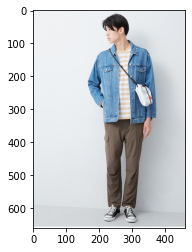

NET_00001.json
NET_00002.jpg
890 2239


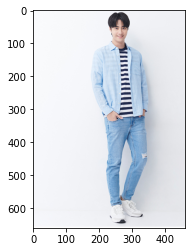

NET_00002.json
NET_00003.jpg
890 2239


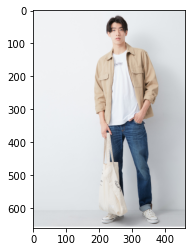

NET_00003.json
NET_00004.jpg
890 2239


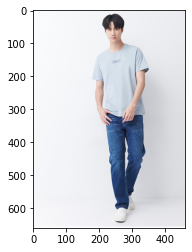

NET_00004.json
NET_00006.jpg
890 2239


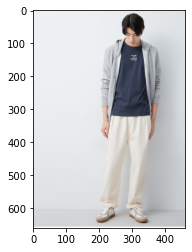

NET_00006.json
NET_00007.jpg
890 2239


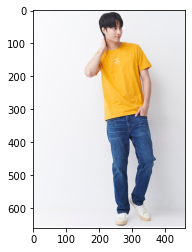

NET_00007.json
NET_00009.jpg
890 2239


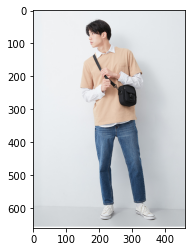

NET_00009.json
NET_00010.jpg
NET_00010.json
NET_00016.jpg
890 2239


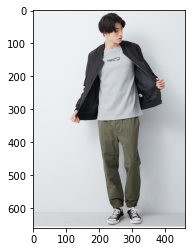

NET_00016.json
NET_00017.jpg
NET_00017.json
NET_00020.jpg
890 2239


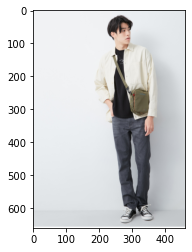

NET_00020.json
NET_00021.jpg
NET_00021.json
NET_00024.jpg
890 2239


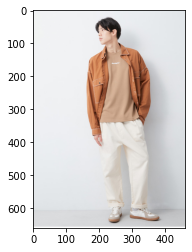

NET_00024.json
NET_00025.jpg
NET_00025.json
NET_00027.jpg
890 2239


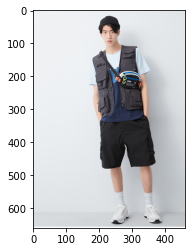

NET_00027.json
NET_00028.jpg
NET_00028.json
NET_00030.jpg
890 2239


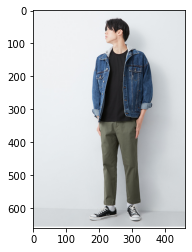

NET_00030.json
NET_00031.jpg
NET_00031.json
NET_00034.jpg
890 2239


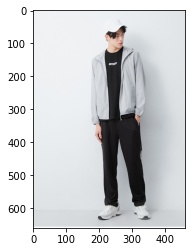

NET_00034.json
NET_00035.jpg
NET_00035.json
NET_00036.jpg
890 2239


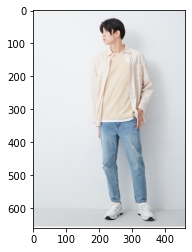

NET_00036.json
NET_00037.jpg
NET_00037.json
NET_00042.jpg
890 2239


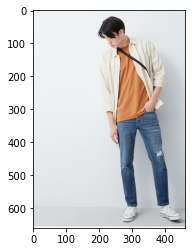

NET_00042.json
NET_00043.jpg
NET_00043.json
NET_00047.jpg
890 2239


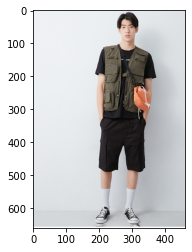

NET_00047.json
NET_00048.jpg
NET_00048.json
NET_00054.jpg
890 2239


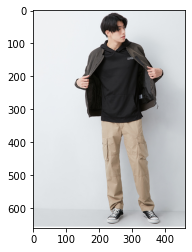

NET_00054.json
NET_00055.jpg
NET_00055.json
NET_00058.jpg
890 2239


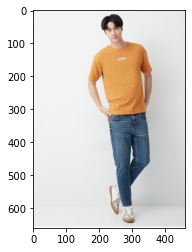

NET_00058.json
NET_00059.jpg
890 595


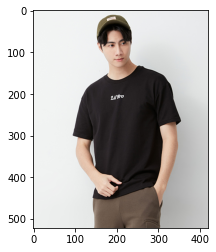

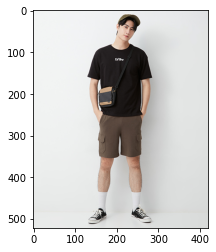

NET_00059.json
NET_00060.jpg
890 2239


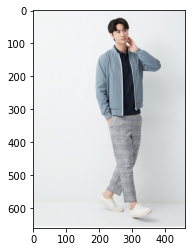

NET_00060.json
NET_00061.jpg
890 595


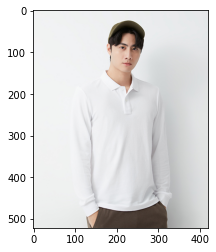

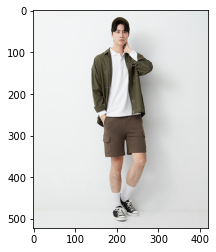

NET_00061.json


In [24]:
path='D:/styler/img/NET/top/uncut/'
jList = os.listdir(path)

for file in jList:
    print(file)
    if file.endswith('.jpg'):
        cut(file)